<a href="https://colab.research.google.com/github/shendytria/Project-Data-Analytics-Program/blob/main/data_Indian_Kids_Screentime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time.csv


## **Get Started**

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

# Display the first few rows of the data
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## **Data Exploration and Cleaning**

In [ ]:
# Display dataset info (columns, data types, non-null counts)
df.info()

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill NaN in Health_Impacts with 'None')
df['Health_Impacts'] = df['Health_Impacts'].fillna('None')

# Check unique values in categorical columns for insights
print("Unique Genders:", df['Gender'].unique())
print("Unique Primary Devices:", df['Primary_Device'].unique())
print("Unique Urban/Rural:", df['Urban_or_Rural'].unique())
print("Unique Health Impacts:", df['Health_Impacts'].unique())  # This may show comma-separated values

# Dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB
               Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1

## **Visualization**

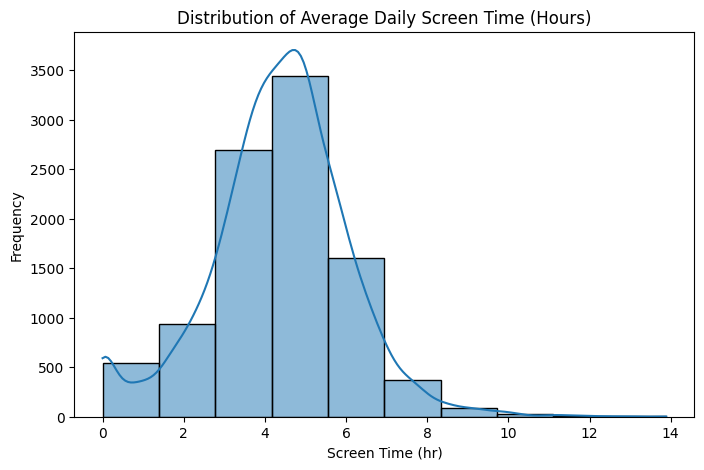

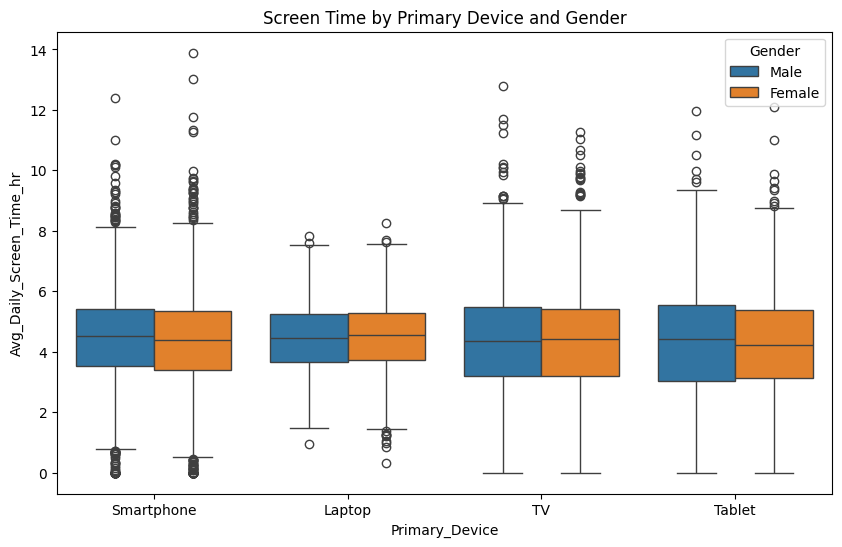

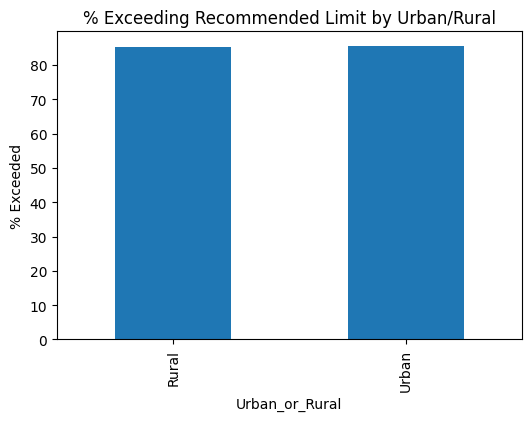

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of average daily screen time
plt.figure(figsize=(8, 5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=10, kde=True)
plt.title('Distribution of Average Daily Screen Time (Hours)')
plt.xlabel('Screen Time (hr)')
plt.ylabel('Frequency')
plt.show()

# Boxplot: Screen time by primary device and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df)
plt.title('Screen Time by Primary Device and Gender')
plt.show()

# Bar plot: Proportion exceeding limit by urban/rural
exceeded_by_area = df.groupby('Urban_or_Rural')['Exceeded_Recommended_Limit'].mean() * 100
exceeded_by_area.plot(kind='bar', figsize=(6, 4))
plt.title('% Exceeding Recommended Limit by Urban/Rural')
plt.ylabel('% Exceeded')
plt.show()

## **Integrate IBM Granite for Classification and Summarization**

In [ ]:
# Install required libraries (run once)
!pip install torch torchvision torchaudio
!pip install accelerate
!pip install git+https://github.com/huggingface/transformers.git  # For latest transformers

import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import pandas as pd

# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load model and tokenizer
model_path = "ibm-granite/granite-3.0-2b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, device_map="auto")
model.eval()

# Function for AI query (for classification or summarization)
def query_granite(prompt):
    chat = [{"role": "user", "content": prompt}]
    chat = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    input_tokens = tokenizer(chat, return_tensors="pt").to(device)
    output = model.generate(**input_tokens, max_new_tokens=200)  # Adjust length as needed
    response = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return response.split("assistant")[-1].strip()  # Extract assistant's response

# Read the CSV file
df = pd.read_csv('Indian_Kids_Screen_Time.csv')

# Display the first few rows of the data
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 627.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

**1. Classification of Health Impacts**

In [11]:
# Classify health impacts with fewer tokens
unique_impacts = df['Health_Impacts'].unique()
classifications = {}
for impact in unique_impacts[:3]:  # Limit to first 3 impacts for testing
    if impact != 'None':
        prompt = f"Classify '{impact}' into: Physical, Mental, Both, None."
        classifications[impact] = query_granite(prompt)
print("Classifications:", classifications)

Classifications: {'Poor Sleep, Eye Strain': "The classification of 'Poor Sleep, Eye Strain' into Physical, Mental, Both, or None would depend on the specific context and the primary cause of the symptoms. However, based on the symptoms alone, it could be classified as Both Physical and Mental. Poor sleep can have physical effects such as fatigue and reduced cognitive function, while eye strain is a common mental health issue that can also have physical symptoms like headaches and dry eyes. Ultimately, a healthcare professional would be able to provide a more accurate classification based on a thorough evaluation.", 'Poor Sleep': "'Poor Sleep' can be classified as 'Both' (Mental and Physical) as it can have significant impacts on both the physical and mental health of an individual. Lack of quality sleep can lead to various physical health issues such as obesity, diabetes, cardiovascular disease, and weakened immune system. On the other hand, poor sleep can also result in mental health 

**2. Summarization of Findings**

In [10]:
# Prepare a sample findings text (replace with actual insights from your analysis)
findings_text = """
Average screen time is 3.5 hours, with urban areas showing a 20% higher average. 60% of kids exceed recommended limits,
leading to common health impacts such as Poor Sleep and Eye Strain. The educational to recreational ratio is low (0.4 on average),
particularly among smartphone users.
"""

prompt = f"Summarize the following data findings and suggest 3 recommendations: {findings_text}"
summary = query_granite(prompt)
print("Summary and Recommendations:", summary)

Summary and Recommendations: The data indicates that the average screen time for children is 3.5 hours, with urban areas having a 20% higher average. This excessive screen time, experienced by 60% of kids, results in common health issues like poor sleep and eye strain. Additionally, the educational-to-recreational screen time ratio is low, especially among smartphone users, suggesting an imbalance in their screen usage.

Recommendations:
1. Implement stricter screen time limits, especially in urban areas, to ensure children's health and well-being.
2. Encourage educational content and activities to maintain a healthy educational-to-recreational screen time ratio.
3. Promote digital literacy and responsible screen usage habits among parents and children.
